Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

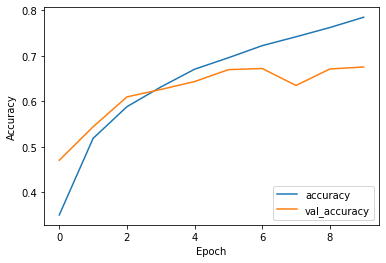

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from __future__ import absolute_import,division,print_function,unicode_literals
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train/255.0
x_test = x_test/255.0
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3) ,activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
print(model.summary())

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
optim = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name='sgd')
model.compile(optimizer = optim,loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=10,batch_size=50,validation_split=0.2)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
